In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 


In [4]:
pdf=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')

In [5]:
pdf.head()
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


In [6]:
df=pd.read_csv('New_Algerian_and_Bejaia_dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4    RH          242 non-null    int64  
 5    Ws          242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


In [7]:
# We have to use New alerian dataset for feature selection and model training 
df.head(4)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,0


In [8]:
# we need to remove day , month and year from this datset because we don't need this
df.drop(['day'] ,axis=1)

,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
1,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
2,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0
3,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,0
4,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
238,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
239,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
240,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,0
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,0


In [10]:
df.drop(['month', 'day','year'] ,axis=1 ,inplace=True)

In [11]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  242 non-null    int64  
 1    RH          242 non-null    int64  
 2    Ws          242 non-null    int64  
 3   Rain         242 non-null    float64
 4   FFMC         242 non-null    float64
 5   DMC          242 non-null    float64
 6   DC           242 non-null    float64
 7   ISI          242 non-null    float64
 8   BUI          242 non-null    float64
 9   FWI          242 non-null    float64
 10  Classes      242 non-null    object 
 11  region       242 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.8+ KB


In [13]:
df.columns=df.columns.str.strip()

In [14]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region'],
      dtype='object')

In [15]:
df['Classes'].value_counts()

Classes
fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [16]:
# not we need to remove spaces from here also so, it wil identify as only tow different attributes
df['Classes']=df['Classes'].str.strip()

In [17]:
df['Classes'].value_counts()

Classes
fire        137
not fire    105
Name: count, dtype: int64

In [18]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,0


In [19]:
# now assigning 0 to not fire and 1 to fire

len(df['Classes'])

242

In [41]:
for i in range(len(df['Classes'])):
    if df['Classes'][i]=='not fire':
        df['Classes'][i]=0
    elif df['Classes'][i]=='fire':
        df['Classes'][i]=1

In [42]:
# plot the correlaton graph so, we can see that the relation between the graph
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
Temperature,1.000000,-0.651609,-0.283250,-0.326500,0.677620,0.487434,0.606712,0.520083,-0.265203
RH,-0.651609,1.000000,0.244191,0.222338,-0.645061,-0.408947,-0.687833,-0.433655,0.406630
Ws,-0.283250,0.244191,1.000000,0.171489,-0.167860,-0.002771,0.005587,-0.074460,0.178158
Rain,-0.326500,0.222338,0.171489,1.000000,-0.544092,-0.289149,-0.348228,-0.380503,0.043584
FFMC,0.677620,-0.645061,-0.167860,-0.544092,1.000000,0.603455,0.740200,0.770379,-0.214601
DMC,0.487434,-0.408947,-0.002771,-0.289149,0.603455,1.000000,0.679949,0.584982,-0.182771
ISI,0.606712,-0.687833,0.005587,-0.348228,0.740200,0.679949,1.000000,0.734358,-0.253887
Classes,0.520083,-0.433655,-0.074460,-0.380503,0.770379,0.584982,0.734358,1.000000,-0.148981
region,-0.265203,0.406630,0.178158,0.043584,-0.214601,-0.182771,-0.253887,-0.148981,1.000000


<Axes: >

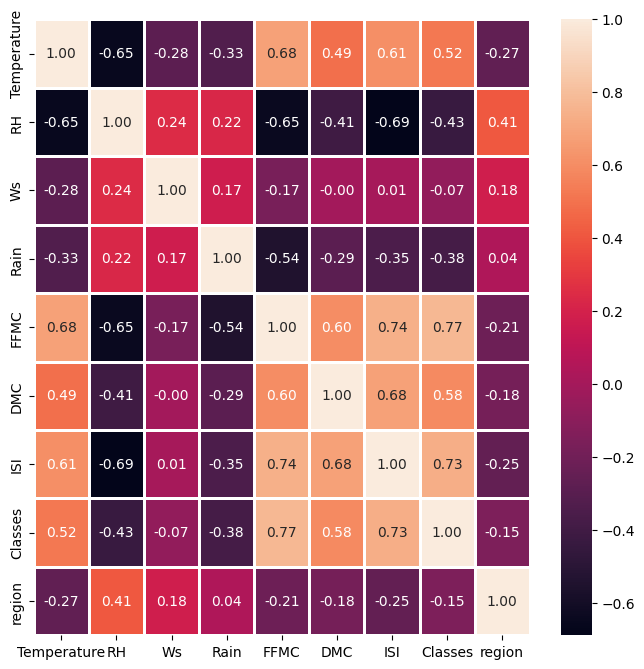

In [43]:
plt.figure(figsize=(8,8))
sb.heatmap(df.corr(), annot=True , linewidths=1 , fmt=".2f")

In [44]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])> threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
  

In [45]:
redundant_column=correlation(df, 0.8)

In [46]:
print(redundant_column)

set()


In [47]:
# now we need to remove this folder from teh dataset to get correct
df.drop(['DC' , 'BUI' , 'FWI'] ,axis=1,inplace=True)

KeyError: "['DC', 'BUI', 'FWI'] not found in axis"

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
0,32,71,12,0.7,57.1,2.5,0.6,0,0
1,30,73,13,4.0,55.7,2.7,0.6,0,0
2,29,80,14,2.0,48.7,2.2,0.3,0,0
3,30,64,14,0.0,79.4,5.2,2.2,0,0
4,32,60,14,0.2,77.1,6.0,1.8,0,0


In [48]:
# first take dependent and independent data 
# Here we want to train the data on the basis of ISI

# x will contain all the data except isi
X=df.drop(['ISI'] ,axis=1)
Y=df['ISI']


In [49]:
# now need to split the data into xtrain ,xtest and ytrain and ytest
# for that we will use train_test_split function from the library of model_selection 
from sklearn.model_selection import train_test_split

X_train, X_test , Y_train , Y_test= train_test_split(X, Y , test_size= 0.3 , random_state=42 )

In [50]:
# afer this we need to standardized the xtest and ytest 
# for standardized we will you StandaraScaler of preprocessing library 

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_trainscaled=scaler.fit_transform(X_train)
print(X_trainscaled)

[[ 0.52185322 -1.32621618 -0.21096676 ... -0.20248035 -1.04231461
  -0.99410024]
 [-2.1834595   0.16844031 -0.21096676 ... -0.90117872 -1.04231461
  -0.99410024]
 [-1.64239695 -0.85064366 -3.26697089 ... -0.21100106 -1.04231461
  -0.99410024]
 ...
 [-1.10133441  0.3722571   1.14725731 ... -0.97786513 -1.04231461
  -0.99410024]
 [-0.28974059  1.18752428 -0.21096676 ...  1.20343711  0.95940322
   1.00593477]
 [-0.28974059  0.71195176 -0.55052277 ... -0.51774669  0.95940322
  -0.99410024]]


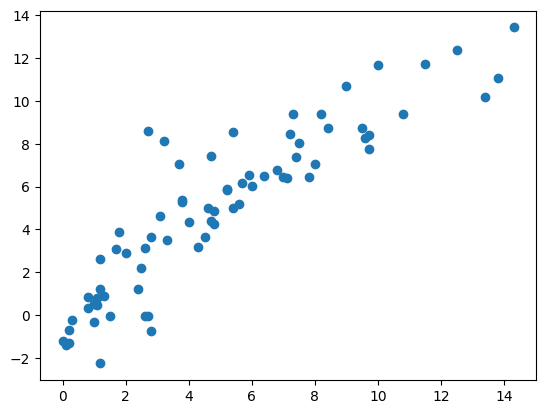

In [51]:
# now we will ttrained our model using linear regeression 
# we will use linearRegression from linear_model
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
# now to train model
regression.fit(X_trainscaled , Y_train)
# now scale teh test data 
X_testscalred=scaler.transform(X_test)
# now pretained the value for test case
Y_pretrained=regression.predict(X_testscalred)
Y_pretrained.shape
# now comparing the ypretrained and y test 
plt.scatter(Y_test, Y_pretrained)




In [52]:
# now let's calculate the accuracy 
# importing r^2_score form library  metrices

from sklearn.metrics import r2_score
score=r2_score(Y_test, Y_pretrained)
print(score)

0.7809158190070541


In [53]:
# now try lasso , ridge and esclinet method to calculate the accuracy 


Lasso Regression


In [54]:
from sklearn.linear_model import Lasso
# since we have pre data so, we directly used that data to check the accuray afeter traingin the model by Lasso
las=Lasso(alpha=0.5)
las.fit(X_trainscaled , Y_train)


Lasso(alpha=0.5)

In [55]:
# now predicting the values for xtest standardized
Y_pretrainedlasso=las.predict(X_testscalred)
Y_pretrainedlasso

array([ 5.17407568e+00,  7.54237513e+00,  8.08198897e-01,  1.04690993e+01,
        3.16700557e+00,  6.75023143e+00,  7.10123059e+00,  7.92122563e+00,
        8.09591029e+00,  7.81227384e+00,  4.70291254e+00,  8.57756905e+00,
       -5.83947212e-04,  5.60184076e+00,  1.03585176e+01,  1.13650496e+00,
        3.83418206e+00, -2.50225541e-01,  2.36193027e+00,  6.54778501e+00,
        6.42762103e+00,  1.21164104e+00,  9.82966370e+00,  2.55903931e+00,
        4.92832077e+00,  5.21034050e-01,  8.36417915e+00,  8.87078785e+00,
        4.04638997e+00,  5.18166990e+00,  9.56510238e+00,  3.97134347e+00,
        6.24741985e+00,  3.24584919e+00,  1.75396401e+00,  4.94712718e+00,
        1.27357680e+00,  6.87609108e+00, -6.81787732e-01,  3.94576981e+00,
        8.79384279e+00, -7.76185786e-02,  6.76894827e+00,  1.51752273e+00,
        6.23982563e+00,  6.44642744e+00,  5.32046115e+00,  7.60431089e+00,
        3.48427088e-01,  2.16102412e+00,  6.83992896e+00,  5.35047975e+00,
        4.15507305e+00,  

In [56]:
Y_pretrained=regression.predict(X_testscalred)
Y_pretrained

array([ 4.99273184,  8.53902928,  0.87115157, 12.38411783,  2.18992819,
        7.77644416,  7.385628  ,  8.4502577 ,  8.73923389,  8.04186577,
        4.41779333,  9.40527334, -0.70982236,  5.9075681 , 11.74150359,
       -0.0531967 ,  3.63979231, -1.27587366,  1.23884411,  6.51310027,
        7.07142992,  0.34089972, 10.68921713,  2.63680977,  4.35940431,
        0.45751593, 10.18406512,  9.38867056,  3.50834082,  4.87409297,
       11.06521799,  3.66602979,  6.44004942,  2.89643484,  0.51815865,
        4.61234643, -0.33132062,  7.05354732, -1.21851717,  3.88079617,
        8.74275276, -1.38586507,  6.4011311 ,  0.78160426,  6.1514134 ,
        5.85979854,  4.98955447,  8.15277368, -0.23994837,  1.24308605,
        7.44561859,  6.00765979,  4.23726106, 13.42793973, -0.7231225 ,
       11.66367051, -0.02687897,  5.21070066, -2.25288178,  6.77416135,
       -0.06038619,  5.28218748,  3.14763376,  6.43281373,  8.28286995,
        3.09016117,  9.3801486 ,  0.90787356,  6.54373699,  3.18

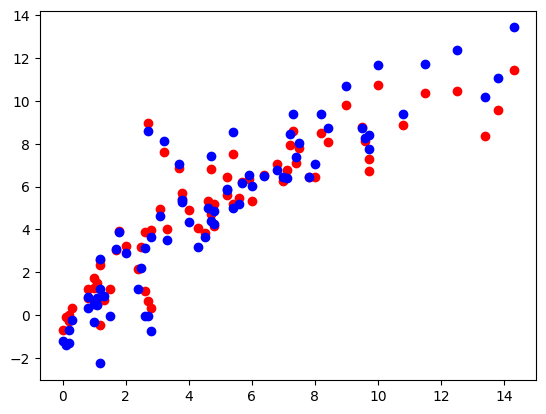

In [57]:
# now plotting the scatter graph for the both 
plt.scatter(Y_test ,Y_pretrainedlasso , c="r")
plt.scatter(Y_test ,Y_pretrained, c="b")

In [58]:
# now calculating accuracy for the lasso 
lassoscore=r2_score(Y_test ,Y_pretrainedlasso)
lassoscore

0.7756183035123048

In [59]:
# now use ridge 
from sklearn.linear_model import Ridge
rid=Ridge(alpha=1)
rid.fit(X_trainscaled , Y_train)


Ridge(alpha=1)

In [62]:
# now predict the output for this 
Y_pretrainedridge=rid.predict(X_testscalred)
Y_pretrainedridge

array([ 5.02847798,  8.50565593,  0.84331051, 12.33025367,  2.2171241 ,
        7.77677953,  7.37350632,  8.41514224,  8.69718642,  8.04530595,
        4.46663732,  9.39521126, -0.76765636,  5.91430581, 11.70740133,
        0.03233334,  3.6669454 , -1.27892493,  1.28551033,  6.49643949,
        7.07867392,  0.35168091, 10.64186811,  2.62149994,  4.37589282,
        0.46480573, 10.14195522,  9.37019265,  3.53147581,  4.88206385,
       11.01991574,  3.66809258,  6.46391733,  2.94001922,  0.56080355,
        4.60576416, -0.25940072,  7.02398256, -1.269479  ,  3.87390004,
        8.7399982 , -1.39316804,  6.42400019,  0.81556605,  6.15489345,
        5.87764032,  4.99268618,  8.11978307, -0.28189807,  1.30749471,
        7.45242589,  6.01091587,  4.24979432, 13.37457115, -0.61067884,
       11.64947938,  0.0289138 ,  5.23712742, -2.17985181,  6.74791957,
        0.02535758,  5.28231854,  3.16226105,  6.41459231,  8.28242586,
        3.10089954,  9.35731359,  0.92124718,  6.5450115 ,  3.22

In [64]:
# now check the accuracy
scorerid=r2_score(Y_test ,Y_pretrainedridge)
scorerid

0.7847308611057151

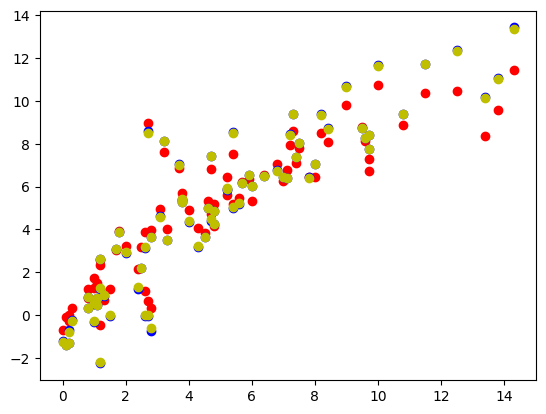

In [65]:
# now plotting the scatter graph for the both 
plt.scatter(Y_test ,Y_pretrainedlasso , c="r")
plt.scatter(Y_test ,Y_pretrained, c="b")
plt.scatter(Y_test, Y_pretrainedridge , c="y")